# EDA DROUGHT o SEQUÍA

Usando dataset ../../Data/03Limpio/03desastreslimpio.csv

## 1. IMPORTAR LIBRERÍAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from time import sleep

## 2. CARGAR DATASET

In [3]:
df = pd.read_csv('../../Data/03Limpio/03desastreslimpio.csv')


In [4]:
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0


In [5]:
df.shape

(16636, 26)

In [6]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

## ANÁLISIS BÁSICO

In [7]:
df.head(3)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             16636 non-null  object
 1   Year               16636 non-null  int64 
 2   Seq                16636 non-null  int64 
 3   Disaster Subgroup  16636 non-null  object
 4   Disaster Type      16636 non-null  object
 5   Disaster Subtype   13313 non-null  object
 6   Country            16636 non-null  object
 7   ISO                16636 non-null  object
 8   Region             16636 non-null  object
 9   Continent          16636 non-null  object
 10  Location           14825 non-null  object
 11  Origin             4085 non-null   object
 12  Associated Dis     3593 non-null   object
 13  Dis Mag Value      16636 non-null  int64 
 14  Dis Mag Scale      15416 non-null  object
 15  Latitude           2775 non-null   object
 16  Longitude          2775 non-null   objec

In [9]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

## 3. FILTRO PARA DROUGHT

In [10]:
drought_filter = (df['Disaster Type'] == 'Drought')
df_drought = df[drought_filter]

In [11]:
df_drought.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
24,1910-9006-BFA,1910,9006,Climatological,Drought,Drought,Burkina Faso,BFA,Western Africa,Africa,...,NaN,1910,0,0,1914,0,0,0,0,0
27,1910-9006-CPV,1910,9006,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1910,0,0,1914,0,0,0,0,0
30,1910-9006-GMB,1910,9006,Climatological,Drought,Drought,Gambia (the),GMB,Western Africa,Africa,...,NaN,1910,0,0,1914,0,0,0,0,0
31,1910-9006-GNB,1910,9006,Climatological,Drought,Drought,Guinea-Bissau,GNB,Western Africa,Africa,...,NaN,1910,0,0,1914,0,0,0,0,0
50,1919-9006-AIA,1919,9006,Climatological,Drought,Drought,Anguilla,AIA,Caribbean,Americas,...,NaN,1919,0,0,1923,0,0,0,0,0
54,1920-9004-CPV,1920,9004,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1920,0,0,1920,0,0,24000,0,0
56,1920-9003-CHN,1920,9003,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,...,NaN,1920,0,0,1920,0,0,500000,20000000,0
96,1928-9002-CHN,1928,9002,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,...,NaN,1928,0,0,1928,0,0,3000000,0,0


### 3.1. ANÁLISIS BÁSICO PARA DF_DROUGHT

In [12]:
df_drought.shape # Tenemos 803 eventos de sequía

(803, 26)

In [13]:
df_drought.isnull().sum()

Dis No                 0
Year                   0
Seq                    0
Disaster Subgroup      0
Disaster Type          0
Disaster Subtype       1
Country                0
ISO                    0
Region                 0
Continent              0
Location             171
Origin               638
Associated Dis       513
Dis Mag Value          0
Dis Mag Scale          0
Latitude             803
Longitude            803
Start Year             0
Start Month            0
Start Day              0
End Year               0
End Month              0
End Day                0
Total Deaths           0
Total Affected         0
Total Damages Adj      0
dtype: int64

In [14]:
df_drought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 16557
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             803 non-null    object
 1   Year               803 non-null    int64 
 2   Seq                803 non-null    int64 
 3   Disaster Subgroup  803 non-null    object
 4   Disaster Type      803 non-null    object
 5   Disaster Subtype   802 non-null    object
 6   Country            803 non-null    object
 7   ISO                803 non-null    object
 8   Region             803 non-null    object
 9   Continent          803 non-null    object
 10  Location           632 non-null    object
 11  Origin             165 non-null    object
 12  Associated Dis     290 non-null    object
 13  Dis Mag Value      803 non-null    int64 
 14  Dis Mag Scale      803 non-null    object
 15  Latitude           0 non-null      object
 16  Longitude          0 non-null      object


### 3.2. ANÁLISIS GEOGRÁFICO DE SEQUÍAS
Usando columnas Location, Country, Region, Continent

### * Análisis básico

In [15]:
df_drought_geografical = df_drought[['Location', 'Country', 'Region', 'Continent']]
df_drought_geografical.shape

(803, 4)

In [16]:
df_drought_geografical.head(5)

,Location,Country,Region,Continent
0,Countrywide,Cabo Verde,Western Africa,Africa
1,Bengal,India,Southern Asia,Asia
24,NaN,Burkina Faso,Western Africa,Africa
27,NaN,Cabo Verde,Western Africa,Africa
30,NaN,Gambia (the),Western Africa,Africa


In [17]:
df_drought_geografical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 16557
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   632 non-null    object
 1   Country    803 non-null    object
 2   Region     803 non-null    object
 3   Continent  803 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [18]:
df_drought_geografical.isnull().sum()

Location     171
Country        0
Region         0
Continent      0
dtype: int64

### * Distribución geográfica de sequías

** Continente

In [19]:
df_drought_geografical['Continent'].value_counts()

Africa      361
Asia        188
Americas    172
Europe       49
Oceania      33
Name: Continent, dtype: int64

** Región

In [20]:
df_drought_geografical['Region'].value_counts()

Eastern Africa               150
Western Africa               112
South America                 70
Eastern Asia                  56
South-Eastern Asia            55
Southern Asia                 54
Central America               49
Southern Africa               44
Middle Africa                 34
Caribbean                     29
Northern America              24
Northern Africa               21
Southern Europe               20
Western Asia                  18
Eastern Europe                17
Australia and New Zealand     13
Melanesia                      9
Micronesia                     7
Western Europe                 6
Northern Europe                5
Central Asia                   5
Polynesia                      4
Russian Federation             1
Name: Region, dtype: int64

** Países

In [21]:
df_drought_geografical['Country'].value_counts()

China                                                         41
Brazil                                                        21
United States of America (the)                                19
Ethiopia                                                      18
Kenya                                                         17
                                                              ..
Mongolia                                                       1
Georgia                                                        1
Algeria                                                        1
Yugoslavia                                                     1
United Kingdom of Great Britain and Northern Ireland (the)     1
Name: Country, Length: 149, dtype: int64

** Ubicación

In [22]:
df_drought_geografical['Location'].value_counts()

Countrywide                                                                                                                                                                                                                                                    15
Nationwide                                                                                                                                                                                                                                                     11
North                                                                                                                                                                                                                                                           4
Central                                                                                                                                                                                                                           

### * Visualización de la distribución geográfica de sequías

** Distribución de sequías por continente

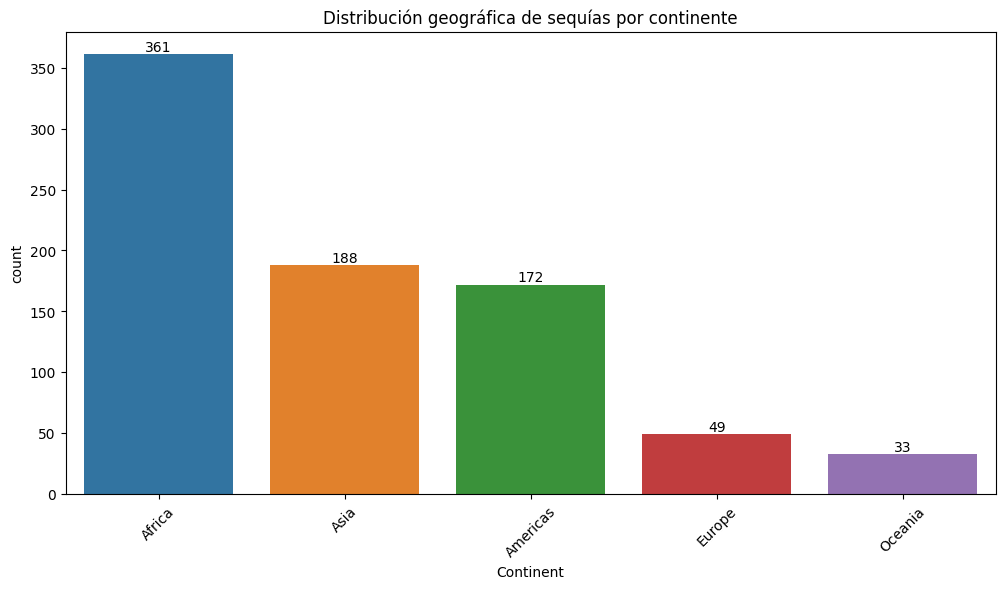

In [23]:
plt.figure(figsize=(12,6))
order = df_drought_geografical['Continent'].value_counts(ascending=False).index
ax =sns.countplot(data=df_drought_geografical, x= 'Continent', order=order)
plt.title('Distribución geográfica de sequías por continente')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0]); 

África es el continente con un mayor número de sequías contabilizadas, 361, cantidad que casi duplica el número de eventos producidos en Asia seguido a muy poca distancia de América

** Distribución de sequías por región

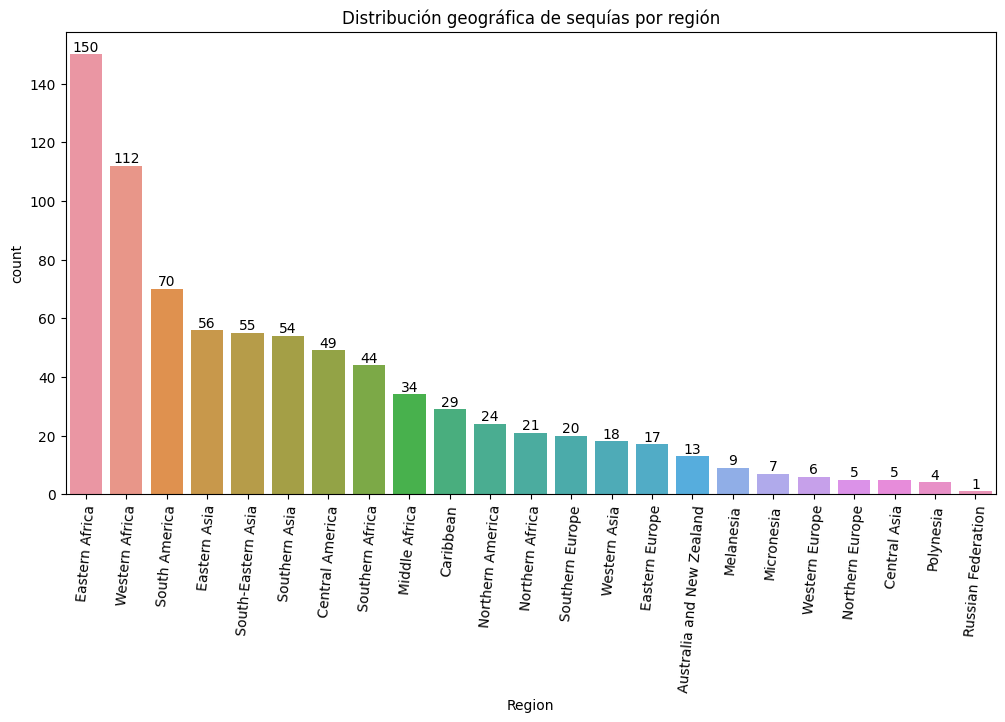

In [24]:
plt.figure(figsize=(12,6))
order = df_drought_geografical['Region'].value_counts(ascending=False).index
ax =sns.countplot(data=df_drought_geografical, x= 'Region', order=order)
plt.title('Distribución geográfica de sequías por región')
plt.xticks(rotation=85)
ax.bar_label(ax.containers[0]); 

El este y oeste de África son las dos regiones con mayor incidencia de este tipo de desastres

** Distribución de sequías por país

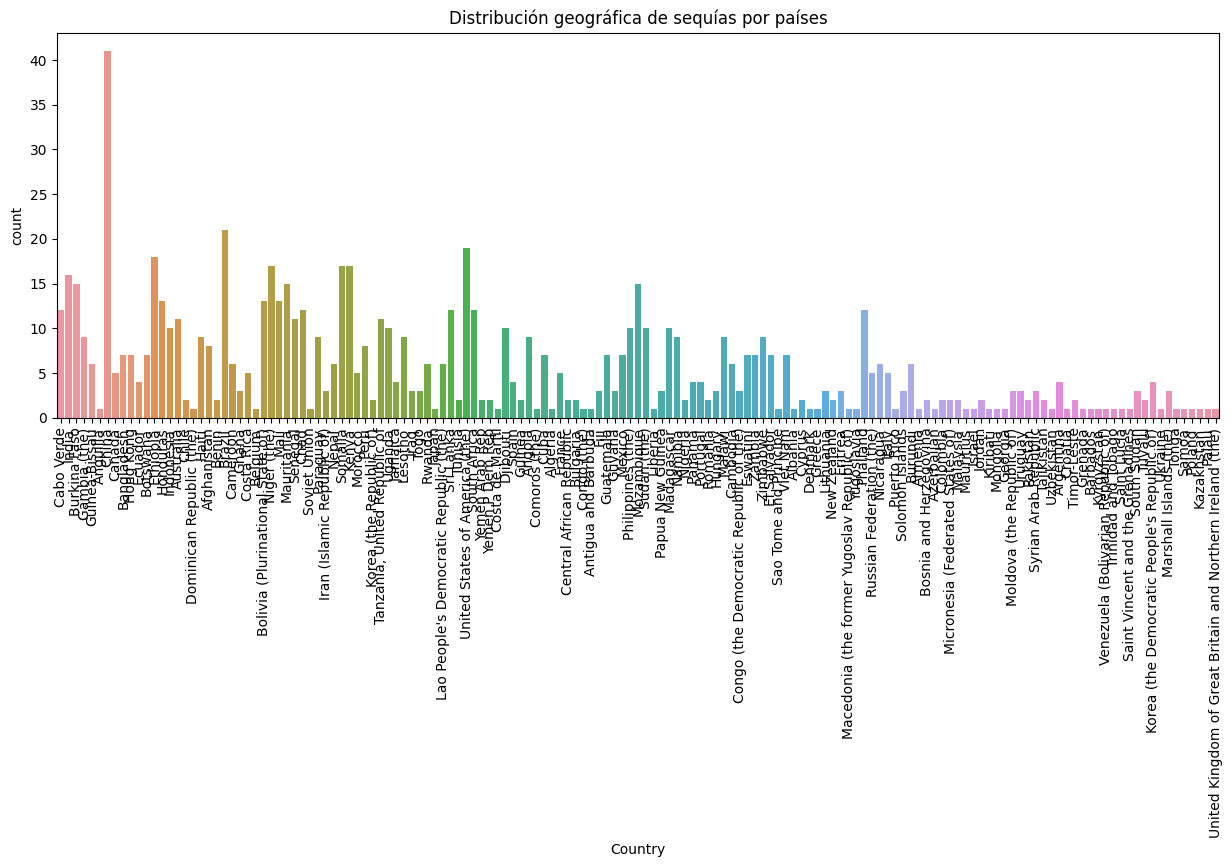

In [25]:
plt.figure(figsize=(15,5))
ax =sns.countplot(data=df_drought_geografical, x= 'Country')
plt.title('Distribución geográfica de sequías por países')
plt.xticks(rotation=90)
plt.show()


In [26]:
top_10_countries = df_drought_geografical['Country'].value_counts().head(10)
top_10_countries

China                             41
Brazil                            21
United States of America (the)    19
Ethiopia                          18
Kenya                             17
Niger (the)                       17
Somalia                           17
India                             16
Mauritania                        15
Mozambique                        15
Name: Country, dtype: int64

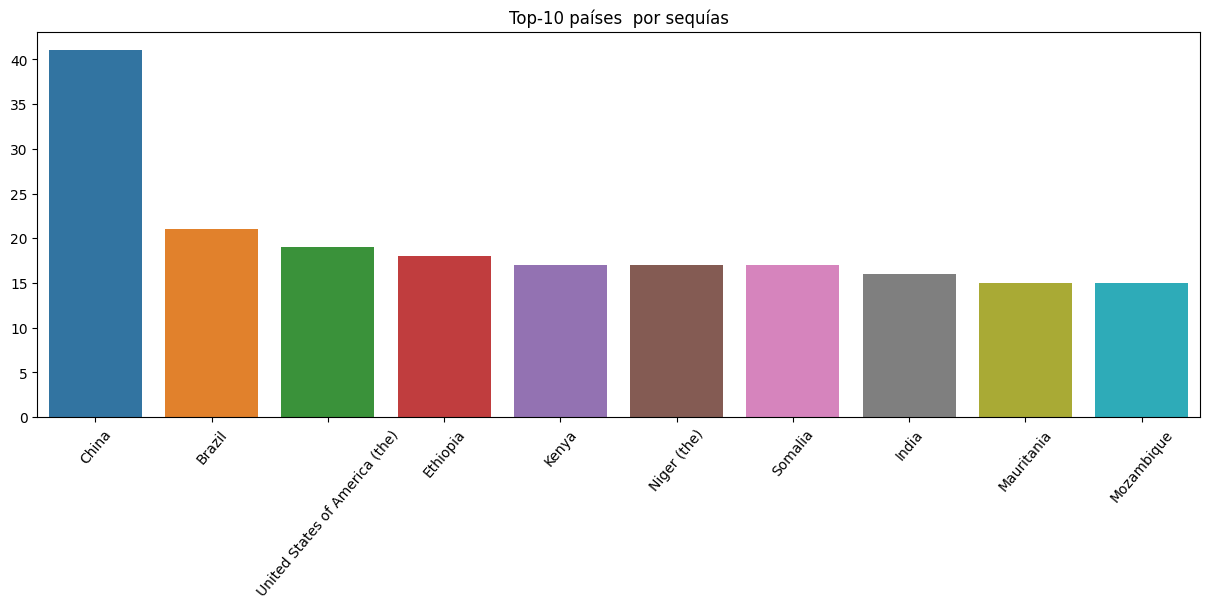

In [27]:
plt.figure(figsize=(15,5))
ax =sns.barplot(y=top_10_countries.values, x=top_10_countries.index)
plt.title('Top-10 países  por sequías')
plt.xticks(rotation=50)
plt.show()

A pesar de que por continente y región el continente africano es el más afectado por las sequías, es China seguido de Brasil y EEUU los países con mayor incidencia de sequías. Hasta el cuarto puesto no aparece un país africano

** Distribución de sequías por ubicación

IMPORTANTE: hay nulos en esta columna

In [28]:
df_drought_geografical['Location'].unique()

array(['Countrywide', 'Bengal', nan, 'North', 'Shensi, Honan, Kansu',
       'Prairie provinces, Western Canada', 'Nicolau, Fogo, Sao Tiago',
       'Calcutta, Bengal region', 'Western Canada', 'Mysore',
       'Rajasthan, center', 'Nationwide except south', 'Nationwide',
       'Central, South-West', 'South Valle, Choluteca', 'Lombok, South',
       'South-East', 'Nationwide, Central Valley, Central Chile',
       'Northwestern region', 'North West Peninsula', 'Paktia province',
       'Entire country', 'East, North of Ougadougou, Northern section',
       'Hamasion division', 'Northeast',
       'Central, North-West, North-East, West regions',
       'Central Java, Southern Isles', 'Central',
       'Tigre, Wollo, North Shoa, Tigray, Kangra provinces',
       'Laguna Arenal', 'Central New South Wales', 'Northwest',
       'Northwest Peninsula',
       'Victoria, South Australia, Southern Inland New South Wales',
       'Southwest of Western Australia', 'Hong Kong',
       'North, Upp

Debido al alto número de ubicaciones diferentes, vamos a localizar las 10 ubicaciones con mayor frecuencia en presencia de sequías


In [29]:
top_10_locations = df_drought_geografical['Location'].value_counts().head(10)
top_10_locations

Countrywide                    15
Nationwide                     11
North                           4
Central                         3
South                           3
Nei Mongol Zizhiqu province     3
Entire country                  3
Northwest                       2
Southern provinces              2
All country                     2
Name: Location, dtype: int64

Como se puede ver las sequías  afectan a todo un país o una nación en la gran mayoría de los casos. También hay referencias geográficas a las zonas N, S, E y O del país. Son muy pocos los casos con una localización restringida.

In [30]:
top_10_locations = df_drought_geografical[['Location', 'Country']].value_counts().head(10)
top_10_locations

Location                           Country     
Nei Mongol Zizhiqu province        China           3
Countrywide                        Cabo Verde      3
                                   Gambia (the)    2
                                   Botswana        2
Inhambane province                 Mozambique      2
Rio Grande Do Sul, Santa Catarina  Brazil          2
Entire country                     Hungary         2
Nationwide                         Botswana        2
                                   Burkina Faso    2
Karamoja                           Uganda          2
dtype: int64

La localización con mayor número de sequías ha sido Nei Mongol en la provincia de Zizhiqu de China

In [31]:
df_drought_geografical.groupby('Location')['Country'].value_counts()

Location                                                                                                                                                                                                                               Country                 
23-25 districts affected (almost all the country): All provinces have been selected                                                                                                                                                    Malawi                      1
42 provinces. 28 provinces in the North and Northeast                                                                                                                                                                                  Thailand                    1
Abim, Amudat, Kaabong, Kotido, Moroto, Nakapiripirit, Napak provinces                                                                                                                                                         

In [32]:
df_drought_geografical.isnull().sum()

Location     171
Country        0
Region         0
Continent      0
dtype: int64

En 'Location' hay 171 nulos. Tratar o eliminar?? Muchas de las ubicaciones hacen referencia a la totalidad del país, countrywide, a escala nacional(nationwide) habría que cruzar los datos

### 3.3 ANÁLISIS DEL IMPACTO HUMANO Y ECONÓMICO DE LAS SEQUÍAS
Usando columnas Associated Dis2, Total Deaths, Total Affected, Total Damages Adj

### * Análisis básico

In [33]:
df[drought_filter].columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

In [34]:
df_drought['Associated Dis'].value_counts()

Food shortage         154
Famine                 55
Heat wave              24
Water shortage         20
Wildfire               14
Crop failure           11
Cold wave               4
Storm                   2
Fire                    2
Snow/ice                1
Epidemic                1
Insect infestation      1
Flood                   1
Name: Associated Dis, dtype: int64

In [35]:
df_drought['Associated Dis'].isnull().sum()

513

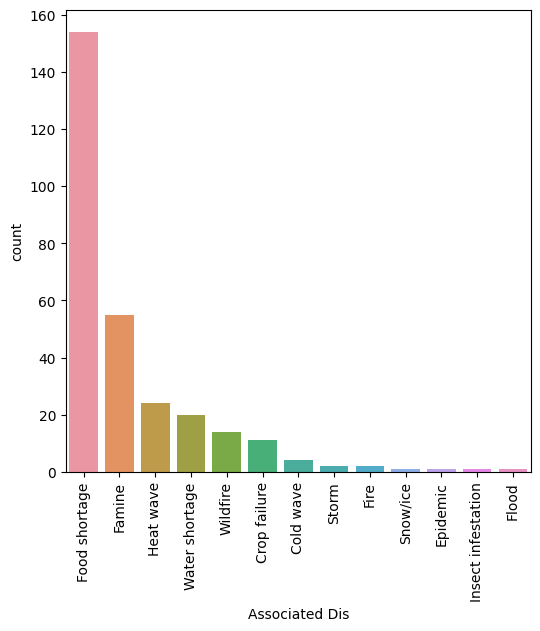

In [36]:
plt.figure(figsize=(6,6))
order = df_drought['Associated Dis'].value_counts(ascending=False).index
sns.countplot(data=df_drought, x='Associated Dis', order=order)
plt.xticks(rotation=90);

De los 13 tipos de  desastres asociados que llevan las sequías el porcentaje más alto corresponde a escasez de comida y el siguiente a mucha distancia, las hambrunas.

In [37]:
df_drought_impact = df[drought_filter][['Total Deaths', 'Total Affected', 'Total Damages Adj']]
df_drought_impact.head(5)

,Total Deaths,Total Affected,Total Damages Adj
0,11000,0,0
1,1250000,0,0
24,0,0,0
27,0,0,0
30,0,0,0


In [38]:
df_drought_impact.isnull().sum()

Total Deaths         0
Total Affected       0
Total Damages Adj    0
dtype: int64

La columna de personas fallecidas está vacía en casi su totalidad y las únicas más completas son las de total de afectados y total de daños ajustado

In [39]:
df_drought_impact['Total Deaths'].sum()

11734025

Aún sin datos las cifras son elevadísimas

In [40]:
df_drought_impact['Total Deaths'].value_counts()

0          732
4            2
2            2
20           2
50           2
8            2
100000       2
600          2
2000         2
9            2
1500000      2
20000        2
12           2
500          2
85           1
41           1
143          1
21           1
115          1
37           1
58           1
11000        1
120          1
79           1
80           1
60           1
134          1
27           1
11           1
24           1
77           1
45           1
136          1
6            1
200          1
672          1
237          1
24000        1
500000       1
3000000      1
1900000      1
30000        1
8000         1
85000        1
1200000      1
19000        1
18           1
300000       1
367          1
1400         1
63           1
280          1
150000       1
230          1
84           1
300          1
1250000      1
3000         1
2465         1
Name: Total Deaths, dtype: int64

Hay dos eventos con 1.500.000 de fallecidos, otro con 1.250.000, otro con 3.000.00, otro con 1.900.00,, otro con 1.200.000,

In [41]:
df_drought_impact['Total Affected'].sum()

2943201381

Casi 3000 millones de personas afectadas solo en en 803 eventos

In [42]:
df_drought_impact['Total Damages Adj'].sum()

374288489

### 3.4 ANÁLISIS DE LA TEMPORALIDAD EN SEQUÍAS
Usando columnas 'Year', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day'.

 * Análisis básico

In [43]:
df_drought.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

In [44]:
df_drought_year = df_drought[['Year', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']]
df_drought_year.head(5)

,Year,Start Year,Start Month,Start Day,End Year,End Month,End Day
0,1900,1900,0,0,1900,0,0
1,1900,1900,0,0,1900,0,0
24,1910,1910,0,0,1914,0,0
27,1910,1910,0,0,1914,0,0
30,1910,1910,0,0,1914,0,0


In [45]:
df_drought_year.isnull().sum()

Year           0
Start Year     0
Start Month    0
Start Day      0
End Year       0
End Month      0
End Day        0
dtype: int64

De día de inicio y de fin no hay datos, por lo tanto esas columnas se obviarán. En general hay más datos de inicio de evento que de finalización.


In [46]:
df_drought_year[['Start Year','End Year']].value_counts()

Start Year  End Year
1983        1983        23
2002        2002        22
2022        2022        21
2012        2012        17
2001        2001        16
                        ..
1982        1987         1
1981        1982         1
1980        1981         1
1977        1980         1
2023        2023         1
Length: 182, dtype: int64

El mayor número de sequías se produjeron en el año 1983, seguido del 2002 y del 2022

## ANÁLISIS BIVARIANTE

In [47]:
df_drought.groupby('Continent')['Total Deaths'].value_counts()

Continent  Total Deaths
Africa     0               325
           9                 2
           50                2
           500               2
           20000             2
                          ... 
Europe     1200000           1
Oceania    0                30
           24                1
           60                1
           600               1
Name: Total Deaths, Length: 70, dtype: int64

In [48]:
a = df_drought.groupby('Continent')['Total Deaths'].sum().reset_index()
a

,Continent,Total Deaths
0,Africa,869596
1,Americas,266
2,Asia,9663477
3,Europe,1200002
4,Oceania,684


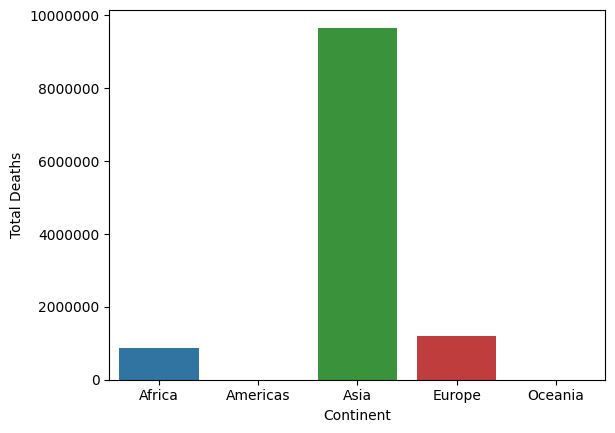

In [49]:
sns.barplot(data=a, x='Continent', y = 'Total Deaths')
plt.ticklabel_format(style='plain', axis='y')

In [50]:
df_drought.groupby('Continent')['Start Year'].value_counts()

Continent  Start Year
Africa     1983          17
           2022          14
           2005          13
           2001          12
           2011          12
                         ..
Oceania    2011           1
           2016           1
           2018           1
           2021           1
           2022           1
Name: Start Year, Length: 234, dtype: int64

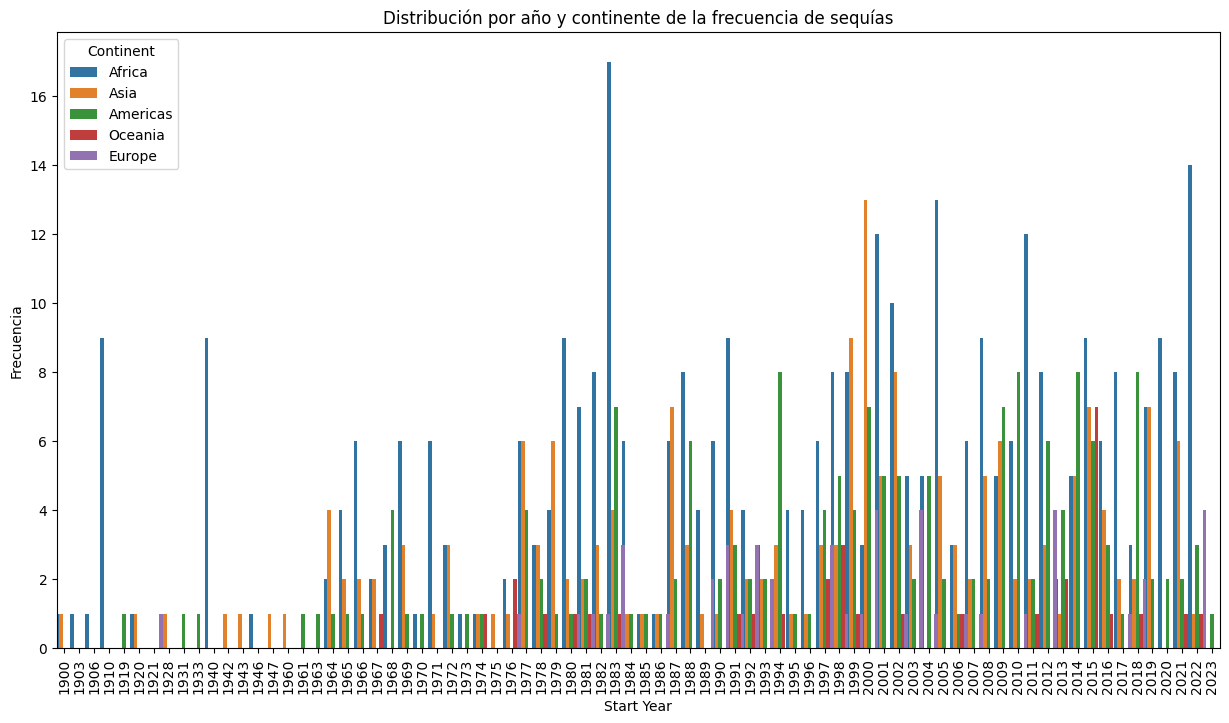

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_drought, x='Start Year', hue='Continent', width=1.2)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Distribución por año y continente de la frecuencia de sequías');

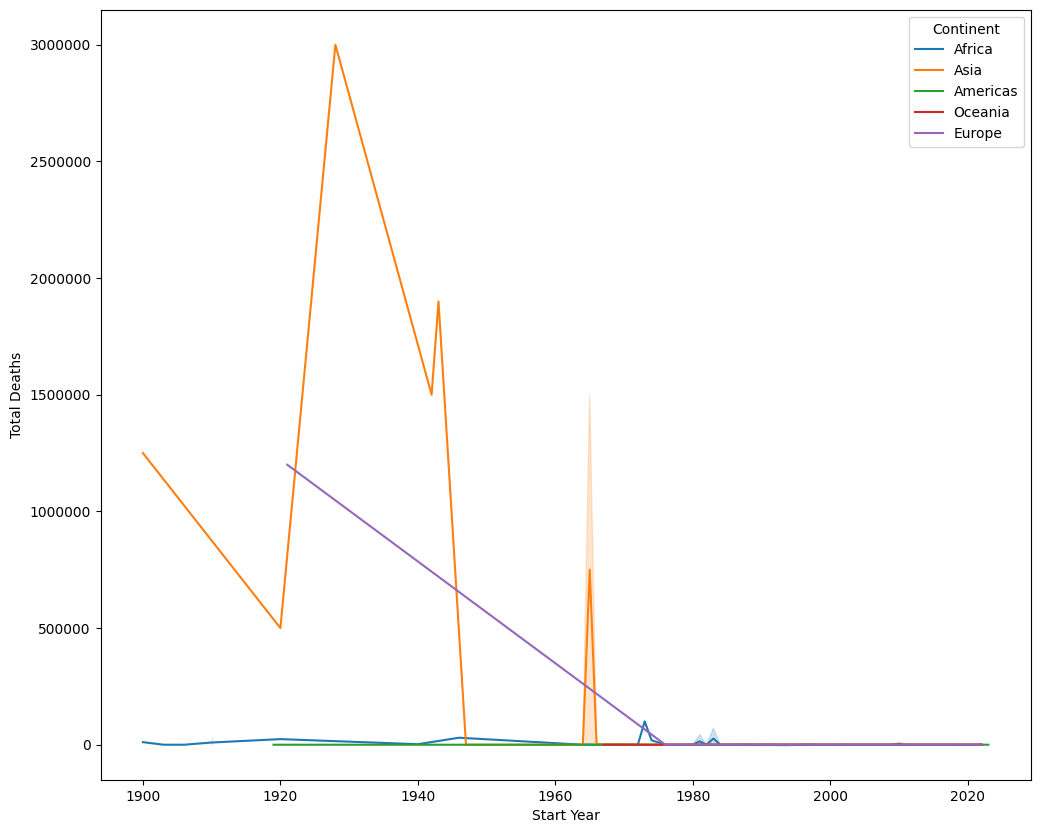

In [52]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df_drought, x='Start Year', y='Total Deaths', hue='Continent')
plt.ticklabel_format(style='plain', axis='y')

In [53]:
df_drought.groupby('Continent')['Total Affected'].sum()

Continent
Africa       608911904
Americas     114040528
Asia        2193989277
Europe        15488769
Oceania       10770903
Name: Total Affected, dtype: int64

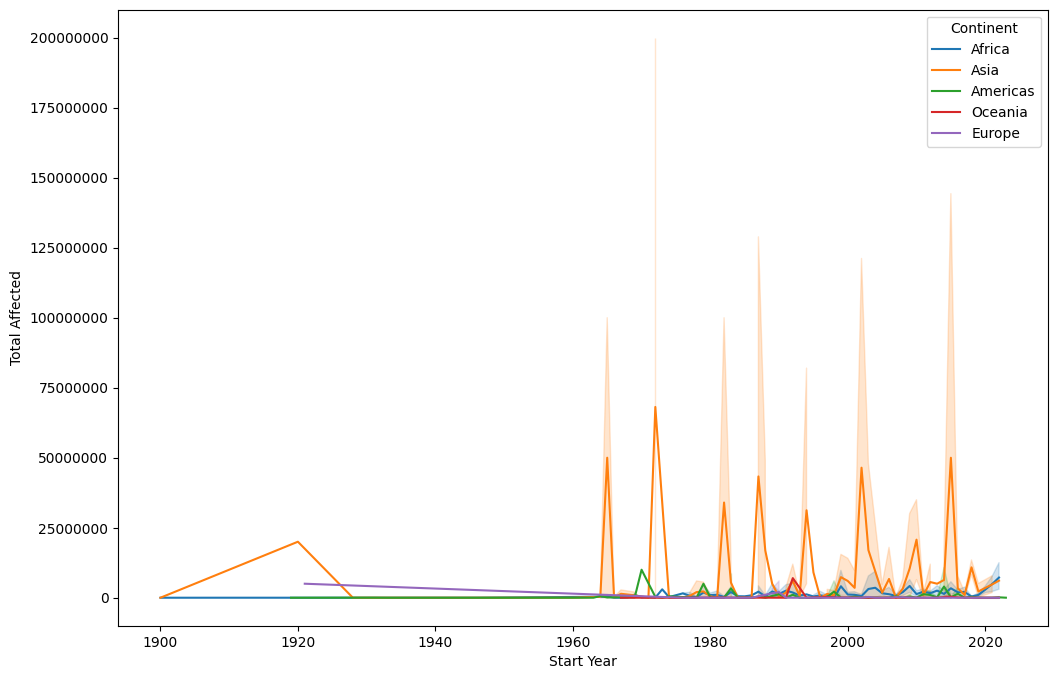

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_drought, x='Start Year', y='Total Affected', hue='Continent')
plt.ticklabel_format(style='plain', axis='y')

In [55]:
df_drought['Total Deaths'].isnull().sum()

0

Sólo tenemos 71 eventos de los 803 registrados con cifras de fallecidos. La mayoría de los Nan corresponden al continente africano por lo que las cifras sean muy superiores a las dadas

In [56]:
df_drought_deaths_affected = df_drought[['Total Affected','Total Deaths']]
df_drought_deaths_affected

,Total Affected,Total Deaths
0,0,11000
1,0,1250000
24,0,0
27,0,0
30,0,0
...,...,...
16479,2678193,0
16486,19110398,0
16506,11839300,0
16534,409115,0


In [57]:
df_drought_deaths_affected.shape

(803, 2)

In [58]:
#df_drought_deaths_affected_sinnulos = df_drought_deaths_affected.dropna(axis=0)
#df_drought_deaths_affected_sinnulos

In [59]:
df_drought['Total Deaths'].shape

(803,)

In [60]:
df_drought['Total Deaths'].isnull().sum()

0

In [61]:
a = df_drought[['Total Deaths', 'Country', 'Continent', 'Start Year']].value_counts(dropna=True)
a

Total Deaths  Country                           Continent  Start Year
0             China                             Asia       2000          3
                                                           2002          3
              Kenya                             Africa     2011          2
              China                             Asia       1992          2
              Bolivia (Plurinational State of)  Americas   1983          2
                                                                        ..
              Guinea-Bissau                     Africa     1972          1
                                                           1982          1
                                                           2002          1
                                                           2006          1
3000000       China                             Asia       1928          1
Length: 785, dtype: int64

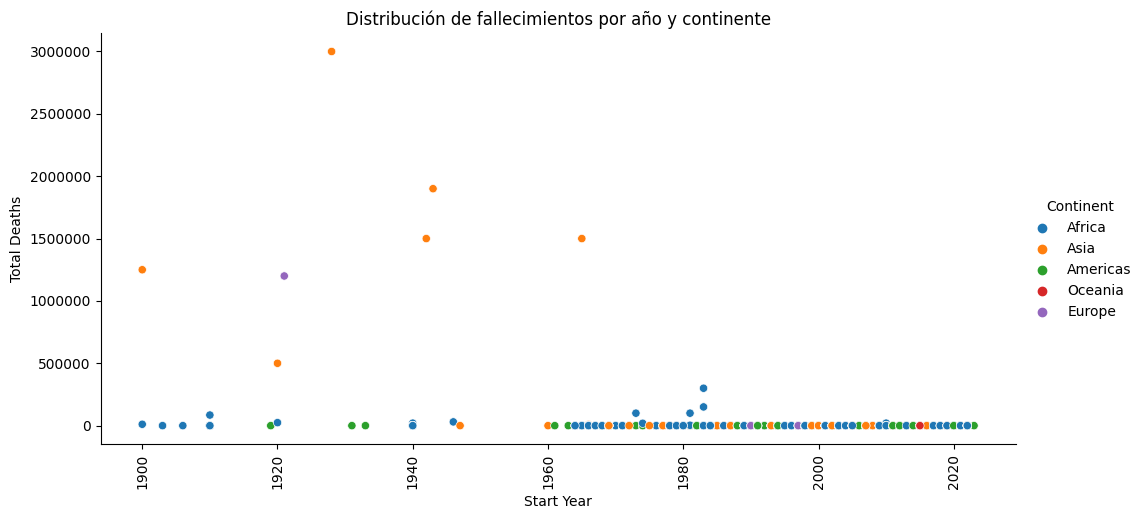

In [62]:
sns.relplot(data=df_drought, x='Start Year', y='Total Deaths', hue="Continent", height=5, aspect=2)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.title('Distribución de fallecimientos por año y continente');

In [63]:
#filtrar para un número de fallecimientos inferior a 500.000 personas
filter = df_drought_deaths_affected['Total Deaths'] < 500000
df_mediomillon_deaths = df_drought_deaths_affected[filter]
df_mediomillon_deaths.reset_index()


,index,Total Affected,Total Deaths
0,0,0,11000
1,24,0,0
2,27,0,0
3,30,0,0
4,31,0,0
...,...,...,...
791,16479,2678193,0
792,16486,19110398,0
793,16506,11839300,0
794,16534,409115,0


De 71 eventos con fallecimientos computados, 64 de ellos se encuentran por debajo de los 500.000 fallecidos

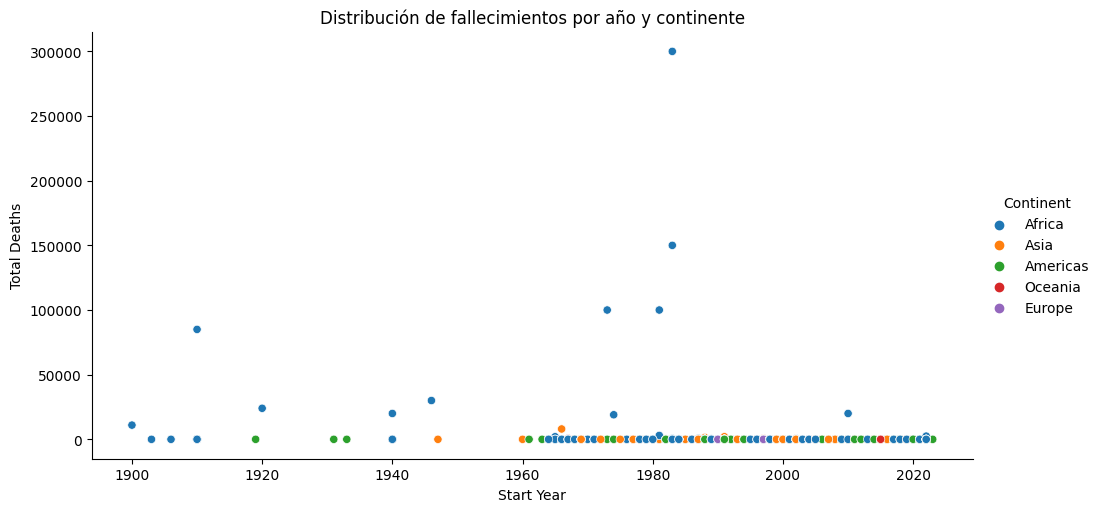

In [64]:
sns.relplot(data=df_drought, x='Start Year', y=df_mediomillon_deaths['Total Deaths'], hue="Continent", height=5, aspect=2)
plt.ticklabel_format(style='plain')
plt.title('Distribución de fallecimientos por año y continente');

In [65]:
df_drought_numeric= df_drought[['Start Year','End Year', 'Total Deaths', 'Total Affected', 'Total Damages Adj']]

<Axes: >

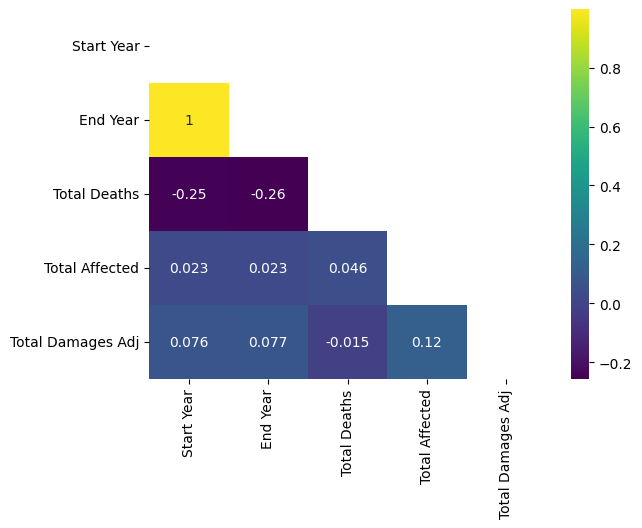

In [66]:

df_corr = df_drought_numeric.corr(numeric_only=True)
filter = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, cmap="viridis", mask = filter)

Sólo hay correlación negativa entre Total Deaths y las fechas. A medida que aummentan las fechas disminuye el número de fallecidos

Si intentamos imputar valores Nan de Total Affected corremos el riesgo de falsear porque apenas tiene relación con ninguna columna

In [67]:
# imputar valores nulos de Total Deahts basándonos en la columna Total Affected 
filter1 = df['Total Affected'].isnull()


for i in df[filter1].index:
    # filtro por Total Deaths
    filter2 = df['Total Deaths'] == df.loc[i,'Total Deaths']
    median = df.loc[ filter2, 'Total Affected'].median()

    if not pd.isnull(median):
        df.loc[i, 'Total Affected'] = median
    else:
        df.loc[i,'Total Affected'] = df['Total Affected'].median()
# estos filtros buscan los nulos de afectados y compara el nº de fallecidos, para el mismo nº de fallecidos hallamos la mediana de los baños y se lo imputamos al valor nulo de baño

In [68]:
df_mediomillon_deaths.reset_index()


,index,Total Affected,Total Deaths
0,0,0,11000
1,24,0,0
2,27,0,0
3,30,0,0
4,31,0,0
...,...,...,...
791,16479,2678193,0
792,16486,19110398,0
793,16506,11839300,0
794,16534,409115,0


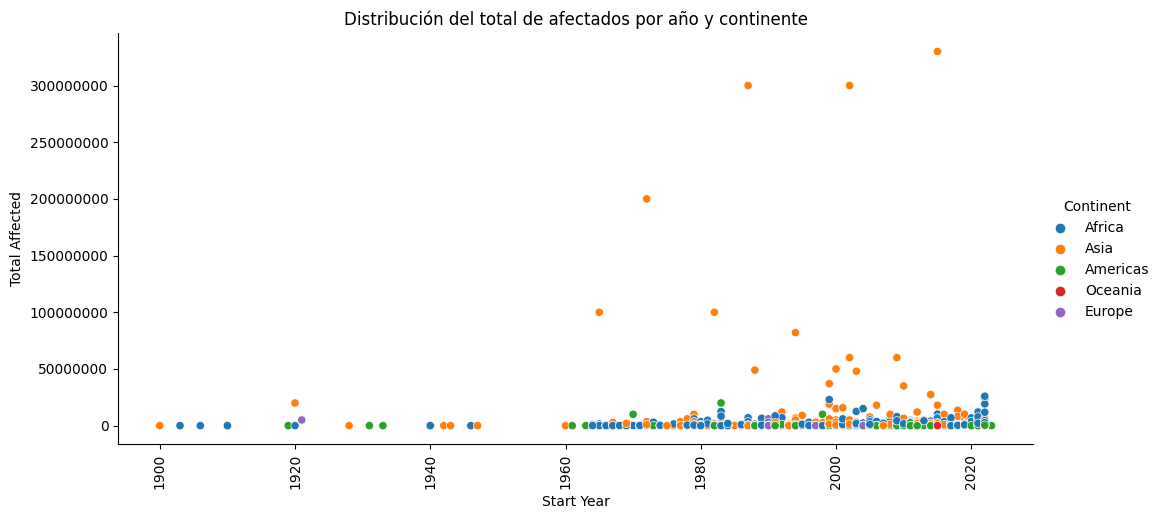

In [69]:
sns.relplot(data=df_drought, x='Start Year', y='Total Affected', hue="Continent", height=5, aspect=2)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.title('Distribución del total de afectados por año y continente');

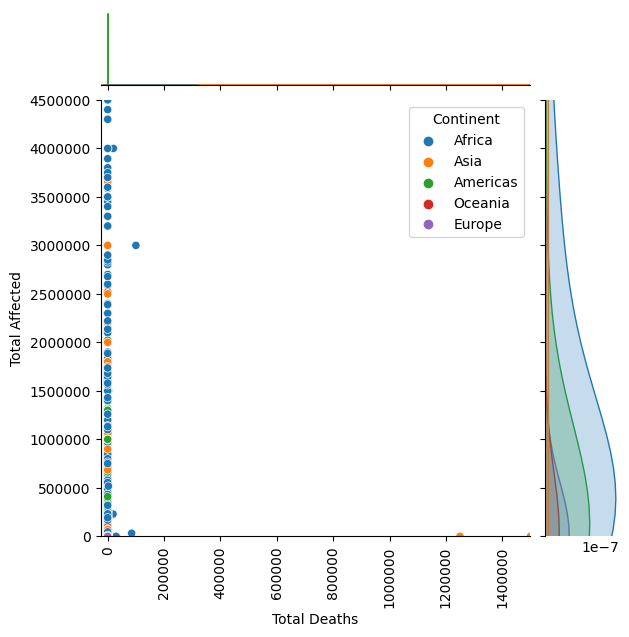

In [70]:
sns.jointplot(data=df_drought, x='Total Deaths', y='Total Affected', hue='Continent', dropna=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.xlim(-25000, 1500000)
plt.ylim(0,4500000);

Aquí sólo se muestran valores de fallecimientos y afectados cuya fila está completa. Tal vez se podría hacer una estimación para rellenar el número de afectados estudiando los valores que tenemos

In [75]:
# para mostrar todas las columnas y todas las filas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [76]:
a = df_drought[['Total Deaths', 'Total Affected', 'Total Damages Adj']]
a

,Total Deaths,Total Affected,Total Damages Adj
0,11000,0,0
1,1250000,0,0
24,0,0,0
27,0,0,0
30,0,0,0
31,0,0,0
50,0,0,0
54,24000,0,0
56,500000,20000000,0
96,3000000,0,0
